# Fixed concentration value



In [7]:
import festim as F
import numpy as np

my_model = F.HydrogenTransportProblem()

H = F.Species("H")
my_model.species = [H]

my_model.mesh = F.Mesh1D(np.linspace(0, 1, 100))

material = F.Material(D_0=1, E_D=0)

left_surf = F.SurfaceSubdomain1D(id=1, x=0)
right_surf = F.SurfaceSubdomain1D(id=2, x=1)
vol = F.VolumeSubdomain1D(id=1, borders=[0, 1], material=material)
my_model.subdomains = [vol, left_surf, right_surf]

my_model.boundary_conditions = [
    F.FixedConcentrationBC(left_surf, value=10, species=H),
    F.FixedConcentrationBC(right_surf, value=0, species=H),
]

my_model.temperature = 300

my_model.settings = F.Settings(atol=1e-10, rtol=1e-10, final_time=100)

my_model.settings.stepsize = F.Stepsize(1)

In [8]:
my_model.initialise()
my_model.run()

Solving HydrogenTransportProblem:   0%|          | 0.00/100 [00:00<?, ?it/s]

In [9]:
my_custom_value = lambda x: 10 * (x[0] + 1)  # Custom value for the left boundary condition

my_model.boundary_conditions[0].value = my_custom_value


my_model.initialise()
my_model.run()

Solving HydrogenTransportProblem:   0%|          | 0.00/100 [00:00<?, ?it/s]

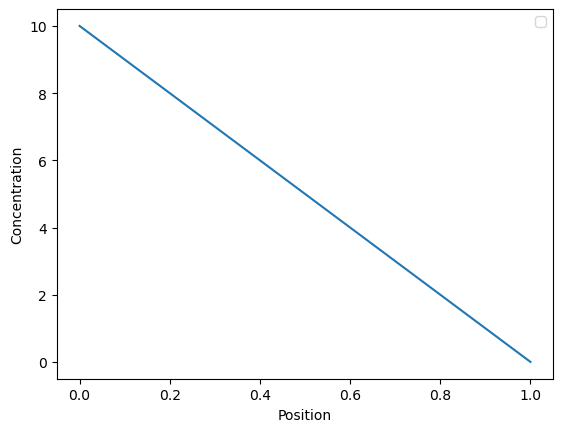

In [10]:
import matplotlib.pyplot as plt

c = H.post_processing_solution.x.array[:]
x = H.post_processing_solution.function_space.mesh.geometry.x[:,0]
plt.plot(x, c)
plt.xlabel('Position')
plt.ylabel('Concentration')
plt.legend()
plt.show()